In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [ ]:
df = pd.read_csv('/content/FastagFraudDetection .csv')
df.head(3)

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud


In [ ]:
df.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Transaction_ID           0
Timestamp                0
Vehicle_Type             0
FastagID                 0
TollBoothID              0
Lane_Type                0
Vehicle_Dimensions       0
Transaction_Amount       0
Amount_paid              0
Geographical_Location    0
Vehicle_Speed            0
Vehicle_Plate_Number     0
Fraud_indicator          0
dtype: int64

In [ ]:
df=df.set_index('Transaction_ID')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction_Amount,4451.0,180.927881,103.004437,0.0,110.0,140.0,300.0,350.0
Amount_paid,4451.0,158.684565,99.857565,0.0,100.0,120.0,180.0,350.0
Vehicle_Speed,4451.0,67.884745,16.632295,10.0,55.0,67.0,82.0,118.0


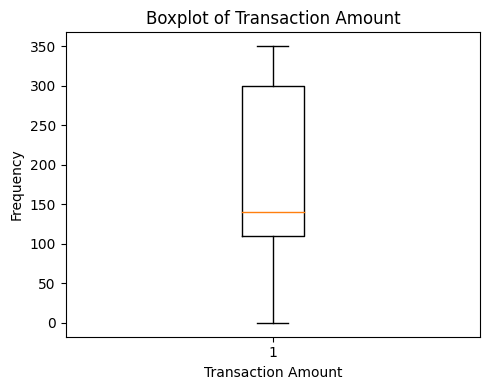

In [ ]:
plt.figure(figsize=(5,4))

plt.boxplot(df['Transaction_Amount'])
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Boxplot of Transaction Amount')


plt.tight_layout()
plt.show()

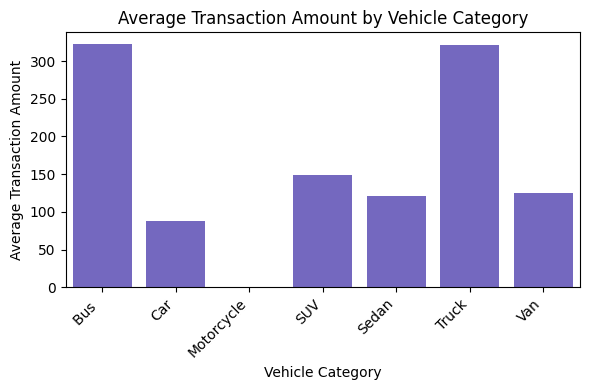

In [ ]:
avg_transaction_amounts = df.groupby('Vehicle_Type')['Transaction_Amount'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x='Vehicle_Type', y='Transaction_Amount', data=avg_transaction_amounts, color='#6A5ACD')
plt.xlabel('Vehicle Category')
plt.ylabel('Average Transaction Amount')
plt.title('Average Transaction Amount by Vehicle Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

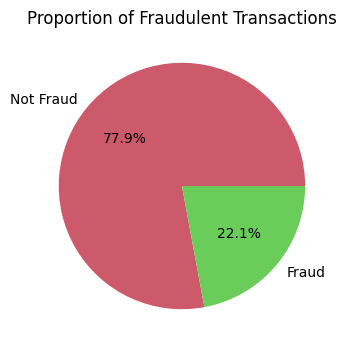

In [ ]:
plt.figure(figsize=(6,4))
df['Fraud_indicator'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#CD5A6A', '#6ACD5A'])
plt.title('Proportion of Fraudulent Transactions')
plt.ylabel('')
plt.show()

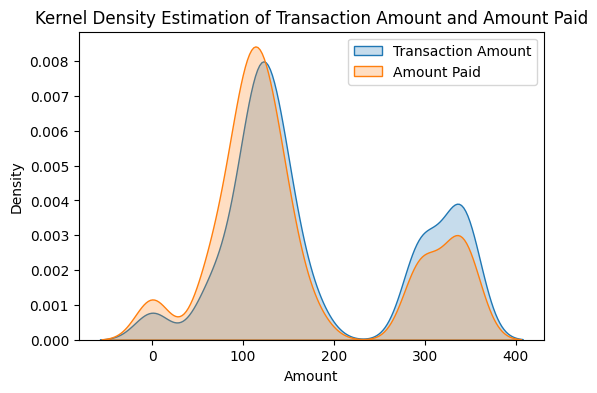

In [ ]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=df['Transaction_Amount'], fill=True, label='Transaction Amount')
sns.kdeplot(data=df['Amount_paid'], fill=True, label='Amount Paid')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Transaction Amount and Amount Paid')
plt.legend()
plt.show()

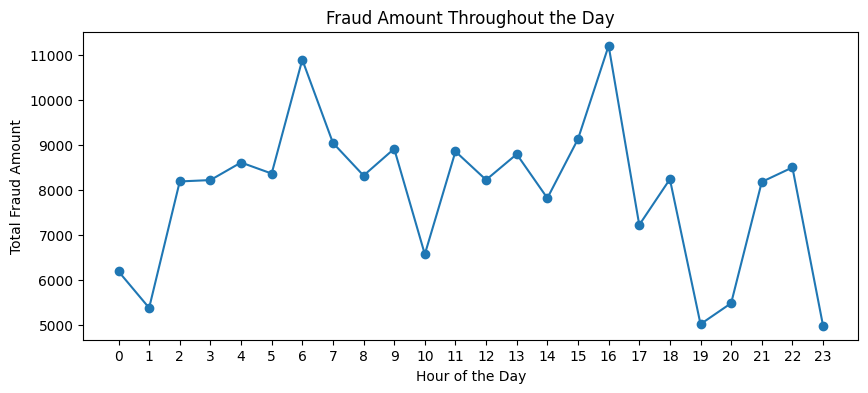

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract hour from the timestamp
df['Hour'] = df['Timestamp'].dt.hour

# Filter fraudulent transactions
fraudulent_transactions = df[df['Fraud_indicator'] == 'Fraud']

# Group by hour and sum transaction amount
fraudulent_amount_by_hour = fraudulent_transactions.groupby('Hour')['Transaction_Amount'].sum()

plt.figure(figsize=(10, 4))
fraudulent_amount_by_hour.plot(marker='o', linestyle='-')
plt.title('Fraud Amount Throughout the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Fraud Amount')
plt.xticks(range(24))
plt.show()

Feature Engineering

In [ ]:
df['Day']=df['Timestamp'].dt.dayofweek

df['Month']=df['Timestamp'].dt.month

In [ ]:
# Calculate the difference between "Transaction_Amount" and "Amount_paid"
df['Amount_Difference'] = df['Transaction_Amount'] - df['Amount_paid']

# Calculate the ratio of "Amount_paid" to "Transaction_Amount"
df['Payment_Ratio'] = df['Amount_paid'] / df['Transaction_Amount']

In [ ]:
df.head(2)

,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,Hour,Day,Month,Amount_Difference,Payment_Ratio
Transaction_ID,,,,,,,,,,,,,,,,,
1,2023-01-06 11:20:00,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud,11,4,1,230,0.342857
2,2023-01-07 14:55:00,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud,14,5,1,20,0.833333


Encoding categorical features

In [ ]:
df = pd.get_dummies(df, columns=['Vehicle_Type', 'Lane_Type', 'Vehicle_Dimensions'])

In [ ]:
label_encoder = LabelEncoder()
df['Fraud_indicator'] = label_encoder.fit_transform(df['Fraud_indicator'])

In [ ]:
df.head(3)

,Timestamp,FastagID,TollBoothID,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,Hour,...,Vehicle_Type_Motorcycle,Vehicle_Type_SUV,Vehicle_Type_Sedan,Vehicle_Type_Truck,Vehicle_Type_Van,Lane_Type_Express,Lane_Type_Regular,Vehicle_Dimensions_Large,Vehicle_Dimensions_Medium,Vehicle_Dimensions_Small
Transaction_ID,,,,,,,,,,,,,,,,,,,,,
1,2023-01-06 11:20:00,FTG-001-ABC-121,A-101,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,0,11,...,0,0,0,0,0,1,0,1,0,0
2,2023-01-07 14:55:00,FTG-002-XYZ-451,B-102,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,0,14,...,0,0,0,0,0,0,1,0,0,1
4,2023-01-09 02:05:00,FTG-044-LMN-322,C-103,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,0,2,...,0,0,0,1,0,0,1,1,0,0


In [ ]:
# Extract latitude and longitude from 'Geographical_Location'
df['Latitude'] = df['Geographical_Location'].apply(lambda x: float(x.split(',')[0]))
df['Longitude'] = df['Geographical_Location'].apply(lambda x: float(x.split(',')[1]))

# Drop the original 'Geographical_Location' column
df.drop(columns=['Geographical_Location'], inplace=True)

In [ ]:
df.head(3)

,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
Transaction_ID,,,,,,,,,,,,
1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud


In [ ]:
df.Fraud_indicator.value_counts()

1    3468
0     983
Name: Fraud_indicator, dtype: int64

<Axes: xlabel='Transaction_ID', ylabel='count'>

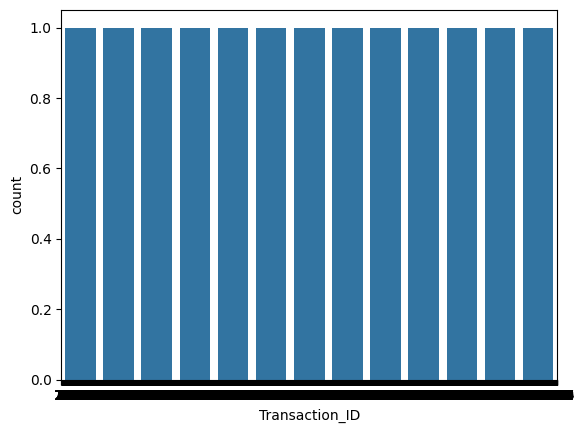

In [ ]:
sns.countplot(df['Fraud_indicator'])

Splitting Dataset into Training and Testing Dataset

In [ ]:
# Separate features and target variable
X = df.drop(columns=['Fraud_indicator', 'Timestamp', 'FastagID', 'TollBoothID','Vehicle_Plate_Number'])
X

,Transaction_Amount,Amount_paid,Vehicle_Speed,Hour,Day,Month,Amount_Difference,Payment_Ratio,Vehicle_Type_Bus,Vehicle_Type_Car,...,Vehicle_Type_Sedan,Vehicle_Type_Truck,Vehicle_Type_Van,Lane_Type_Express,Lane_Type_Regular,Vehicle_Dimensions_Large,Vehicle_Dimensions_Medium,Vehicle_Dimensions_Small,Latitude,Longitude
Transaction_ID,,,,,,,,,,,,,,,,,,,,,
1,350,120,65,11,4,1,230,0.342857,1,0,...,0,0,0,1,0,1,0,0,13.059816,77.770687
2,120,100,78,14,5,1,20,0.833333,0,1,...,0,0,0,0,1,0,0,1,13.059816,77.770687
4,350,120,92,2,0,1,230,0.342857,0,0,...,0,1,0,0,1,1,0,0,13.059816,77.770687
5,140,100,60,6,1,1,40,0.714286,0,0,...,0,0,1,1,0,0,1,0,13.059816,77.770687
6,160,100,105,10,2,1,60,0.625000,0,0,...,1,0,0,0,1,0,1,0,13.059816,77.770687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,330,330,81,22,6,1,0,1.000000,0,0,...,0,1,0,0,1,1,0,0,13.213316,77.554135
4997,125,125,64,13,1,1,0,1.000000,0,0,...,0,0,1,1,0,0,1,0,13.213316,77.554135
4998,115,115,93,5,6,2,0,1.000000,0,0,...,1,0,0,0,1,0,1,0,13.213316,77.554135


In [ ]:
y = df['Fraud_indicator']
y

Transaction_ID
1       0
2       0
4       0
5       0
6       0
       ..
4996    1
4997    1
4998    1
4999    1
5000    0
Name: Fraud_indicator, Length: 4451, dtype: int64

In [ ]:
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the features and transform the features
X_imputed = imputer.fit_transform(X)

rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_imputed, y)

feature_importances = rf_classifier.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by feature importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top 5 important features
top_n = 5
print(f"Top {top_n} Important Features:")
print(feature_importance_df.head(top_n))

Top 5 Important Features:
                     Feature  Importance
6          Amount_Difference    0.477705
7              Payment_Ratio    0.363674
1                Amount_paid    0.094452
0         Transaction_Amount    0.024782
19  Vehicle_Dimensions_Small    0.004718


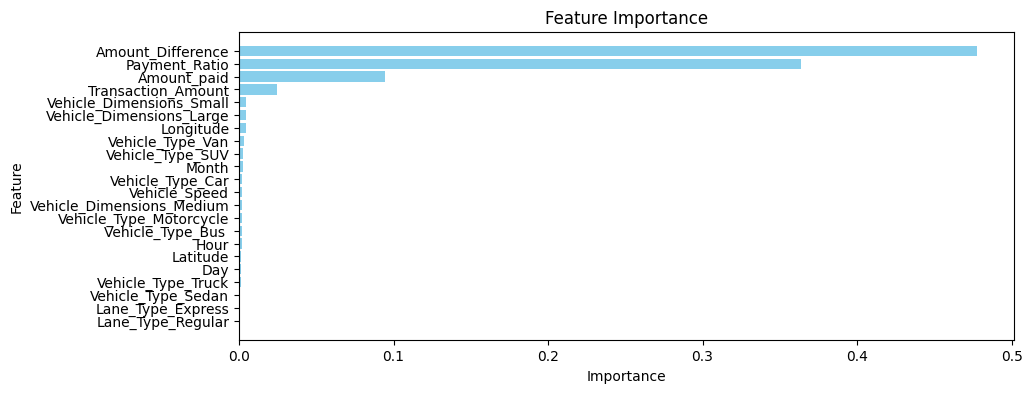

In [ ]:
plt.figure(figsize=(10, 4))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
top_features = feature_importance_df.head(5)['Feature'].tolist()
X_top_features = X[top_features]
y = df['Fraud_indicator']

# StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

logistic_model = LogisticRegression()

# Initialize lists to store evaluation metrics
accuracies = []

# Perform cross-validation
for train_index, test_index in skf.split(X_top_features, y):
    X_train, X_test = X_top_features.iloc[train_index], X_top_features.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Impute missing values
    imputer = SimpleImputer(strategy='mean')
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)

    # Fit the model
    logistic_model.fit(X_train_imputed, y_train)
        # Make predictions
    y_pred = logistic_model.predict(X_test_imputed)

    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Calculate mean accuracy
mean_accuracy = np.mean(accuracies)
print("Mean Accuracy of stratified cross validation:", mean_accuracy)

# Display classification report using the entire dataset
X_imputed = imputer.fit_transform(X_top_features)
logistic_model.fit(X_imputed, y)
y_pred = logistic_model.predict(X_imputed)
print("Classification Report:")
print(classification_report(y, y_pred))

Mean Accuracy of stratified cross validation: 0.9836002976077882
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       983
           1       0.98      1.00      0.99      3468

    accuracy                           0.98      4451
   macro avg       0.99      0.96      0.98      4451
weighted avg       0.98      0.98      0.98      4451



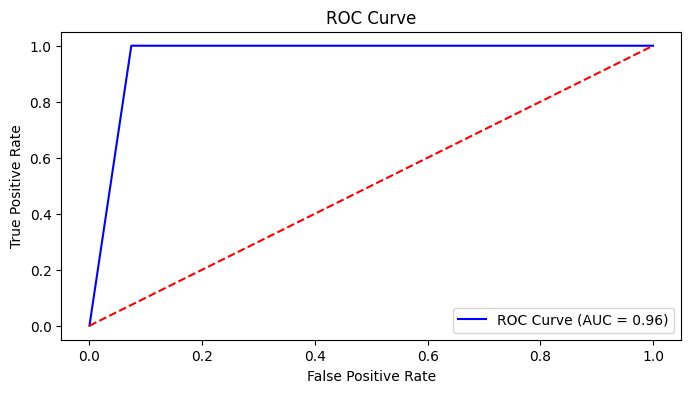

In [ ]:
# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, color='b', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

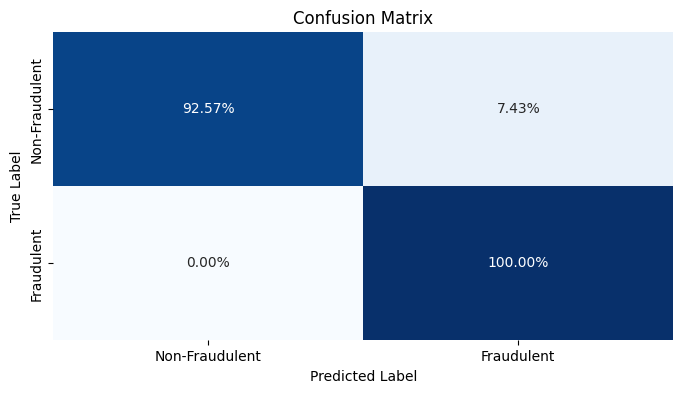

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y, y_pred)

# Normalize confusion matrix
cm_norm = cm / cm.sum(axis=1)[:, np.newaxis]  # Normalize along the true labels (rows)

# Define class labels
class_labels = ['Non-Fraudulent', 'Fraudulent']

# Plot confusion matrix with probabilities
plt.figure(figsize=(8, 4))
sns.heatmap(cm_norm, annot=True, cmap='Blues', fmt='.2%', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import joblib

In [ ]:
import joblib
joblib.dump(rf_classifier,'Fastag_Fraud_Detection_Model')

['Fastag_Fraud_Detection_Model']

In [ ]:
model=joblib.load('Fastag_Fraud_Detection_Model')

In [ ]:
X.columns

Index(['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed', 'Hour', 'Day',
       'Month', 'Amount_Difference', 'Payment_Ratio', 'Vehicle_Type_Bus ',
       'Vehicle_Type_Car', 'Vehicle_Type_Motorcycle', 'Vehicle_Type_SUV',
       'Vehicle_Type_Sedan', 'Vehicle_Type_Truck', 'Vehicle_Type_Van',
       'Lane_Type_Express', 'Lane_Type_Regular', 'Vehicle_Dimensions_Large',
       'Vehicle_Dimensions_Medium', 'Vehicle_Dimensions_Small', 'Latitude',
       'Longitude'],
      dtype='object')

In [ ]:
model.predict([[500,245,42,12,5,3,255,0.49,0,1,1,0,0,0,1,1,0,1,0,1,13.059816,77.770687]])

array([0])

In [ ]:
#Not Fraud = 1
#Fraud = 0